### 멀티모달 검색

c:\Users\Admin\miniconda3\envs\lanchain_study311\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\datasets--detection-datasets--coco. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


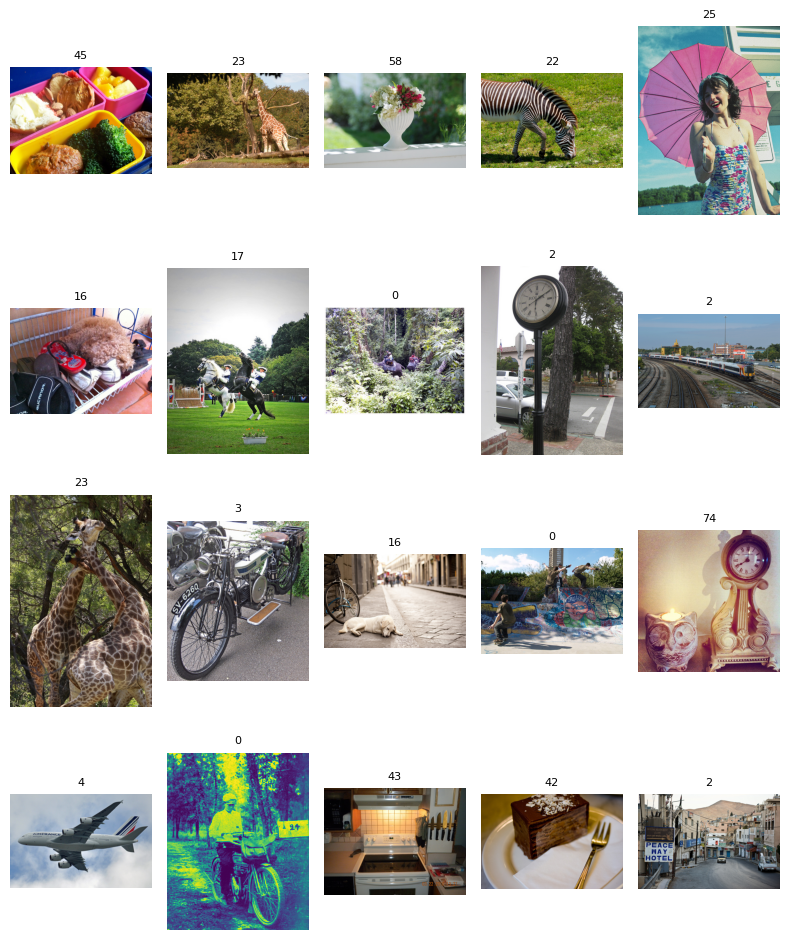

In [ ]:
### 데이터 세트

import os
from datasets import load_dataset
from matplotlib import pyplot as plt

# COCO 데이터셋 로드
dataset = load_dataset(
    path="detection-datasets/coco", name="default", split="train", streaming=True
)

# 이미지 저장 폴더와 이미지 개수 설정
IMAGE_FOLDER = "tmp"
N_IMAGES = 20

# 그래프 플로팅을 위한 설정
plot_cols = 5
plot_rows = N_IMAGES // plot_cols
fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(plot_rows * 2, plot_cols * 2))
axes = axes.flatten()

# 이미지를 폴더에 저장하고 그래프에 표시
dataset_iter = iter(dataset)
os.makedirs(IMAGE_FOLDER, exist_ok=True)
for i in range(N_IMAGES):
    # 데이터셋에서 이미지와 레이블 추출
    data = next(dataset_iter)
    image = data["image"]
    label = data["objects"]["category"][0]  # 첫 번째 객체의 카테고리를 레이블로 사용

    # 그래프에 이미지 표시 및 레이블 추가
    axes[i].imshow(image)
    axes[i].set_title(label, fontsize=8)
    axes[i].axis("off")

    # 이미지 파일로 저장
    image.save(f"{IMAGE_FOLDER}/{i}.jpg")

# 그래프 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()


In [5]:
import open_clip
import pandas as pd

# 사용 가능한 모델/Checkpoint 를 출력
pd.DataFrame(open_clip.list_pretrained(), columns=["model_name", "checkpoint"]).head(10)


,model_name,checkpoint
0,RN50,openai
1,RN50,yfcc15m
2,RN50,cc12m
3,RN101,openai
4,RN101,yfcc15m
5,RN50x4,openai
6,RN50x16,openai
7,RN50x64,openai
8,ViT-B-32,openai
9,ViT-B-32,laion400m_e31


In [ ]:
from langchain_experimental.open_clip import OpenCLIPEmbeddings

# OpenCLIP 임베딩 함수 객체 생성
image_embedding_function = OpenCLIPEmbeddings(
    model_name="ViT-H-14-378-quickgelu", checkpoint="dfn5b"
)
